In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json

In [74]:
agents = ["AlwaysDefect","AlwaysCooperate","TitforTat","NotTitforTat"]

In [75]:
df = pd.read_csv("data.csv")

In [76]:
df.head()

,agent1,agent2,agent3,agent4,dynamics,game,gamma,generations_until_stability,initial_distribution
0,"[0.25, 0.24999861992278735]","[0.25, 0.24999964329358812]","[0.25, 0.2500007774585631]","[0.25, 0.25000095932506144]",replicator,Prisoner's Dilemma,0.95,2,"[0.25, 0.25, 0.25, 0.25]"
1,"[0.4, 0.39999918521554895]","[0.4, 0.39999456172877124]","[0.1, 0.10000060587442994]","[0.1, 0.10000095738949004]",replicator,Prisoner's Dilemma,0.95,2,"[0.4, 0.4, 0.1, 0.1]"
2,"[0.1, 0.10000161263107654]","[0.1, 0.09999998528957198]","[0.4, 0.39999669239762814]","[0.4, 0.3999969159197778]",replicator,Prisoner's Dilemma,0.95,2,"[0.1, 0.1, 0.4, 0.4]"
3,"[0.4, 0.39999381669185446]","[0.1, 0.1000012171656001]","[0.4, 0.39999356082182824]","[0.1, 0.10000193845597924]",replicator,Prisoner's Dilemma,0.95,2,"[0.4, 0.1, 0.4, 0.1]"
4,"[0.1, 0.10000365922363344]","[0.4, 0.3999935113382955]","[0.1, 0.09999847479606966]","[0.4, 0.39999795258289217]",replicator,Prisoner's Dilemma,0.95,2,"[0.1, 0.4, 0.1, 0.4]"


In [77]:
df

,agent1,agent2,agent3,agent4,dynamics,game,gamma,generations_until_stability,initial_distribution
0,"[0.25, 0.24999861992278735]","[0.25, 0.24999964329358812]","[0.25, 0.2500007774585631]","[0.25, 0.25000095932506144]",replicator,Prisoner's Dilemma,0.95,2,"[0.25, 0.25, 0.25, 0.25]"
1,"[0.4, 0.39999918521554895]","[0.4, 0.39999456172877124]","[0.1, 0.10000060587442994]","[0.1, 0.10000095738949004]",replicator,Prisoner's Dilemma,0.95,2,"[0.4, 0.4, 0.1, 0.1]"
2,"[0.1, 0.10000161263107654]","[0.1, 0.09999998528957198]","[0.4, 0.39999669239762814]","[0.4, 0.3999969159197778]",replicator,Prisoner's Dilemma,0.95,2,"[0.1, 0.1, 0.4, 0.4]"
3,"[0.4, 0.39999381669185446]","[0.1, 0.1000012171656001]","[0.4, 0.39999356082182824]","[0.1, 0.10000193845597924]",replicator,Prisoner's Dilemma,0.95,2,"[0.4, 0.1, 0.4, 0.1]"
4,"[0.1, 0.10000365922363344]","[0.4, 0.3999935113382955]","[0.1, 0.09999847479606966]","[0.4, 0.39999795258289217]",replicator,Prisoner's Dilemma,0.95,2,"[0.1, 0.4, 0.1, 0.4]"
5,"[0.25, 0.24999984458409505]","[0.25, 0.25000092791689077]","[0.25, 0.24999968980431764]","[0.25, 0.24999953769469652]",replicator,Prisoner's Dilemma,0.99,2,"[0.25, 0.25, 0.25, 0.25]"
6,"[0.4, 0.39999758830035403]","[0.4, 0.3999982542819811]","[0.1, 0.10000165055319671]","[0.1, 0.09999938880121953]",replicator,Prisoner's Dilemma,0.99,2,"[0.4, 0.4, 0.1, 0.1]"
7,"[0.1, 0.10000373808697036]","[0.1, 0.09999934573728289]","[0.4, 0.3999927363924673]","[0.4, 0.3999949283105198]",replicator,Prisoner's Dilemma,0.99,2,"[0.1, 0.1, 0.4, 0.4]"
8,"[0.4, 0.3999977137240249]","[0.1, 0.10000224411041411]","[0.4, 0.399997693836866]","[0.1, 0.09999890399936319]",replicator,Prisoner's Dilemma,0.99,2,"[0.4, 0.1, 0.4, 0.1]"
9,"[0.1, 0.10000331643532498]","[0.4, 0.3999939433306908]","[0.1, 0.09999993222083364]","[0.4, 0.3999930620446748]",replicator,Prisoner's Dilemma,0.99,2,"[0.1, 0.4, 0.1, 0.4]"


## Use these graphs to find which combinations are 'interesting'

In [78]:
json.loads(df.iloc[0]['agent1'])

[0.25, 0.24999861992278735]

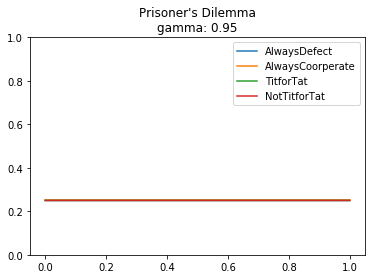

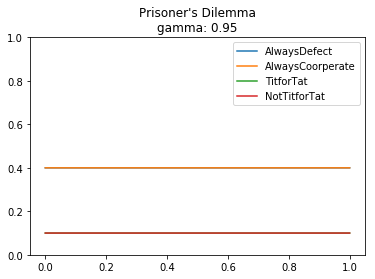

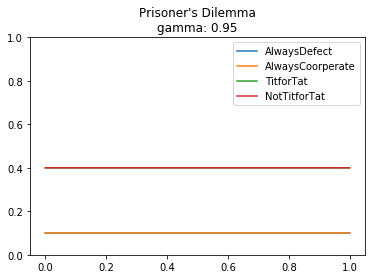

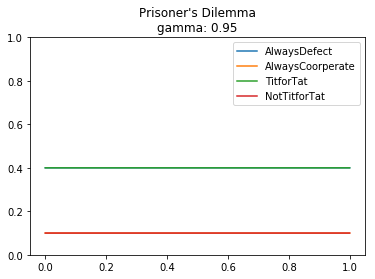

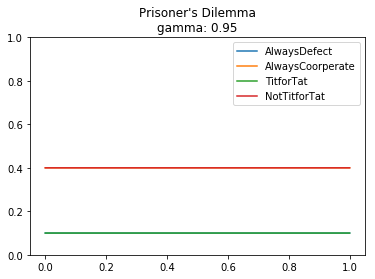

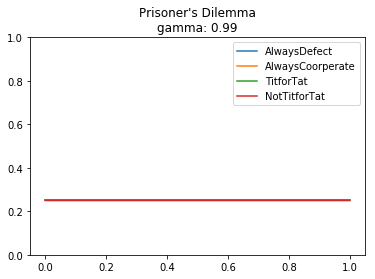

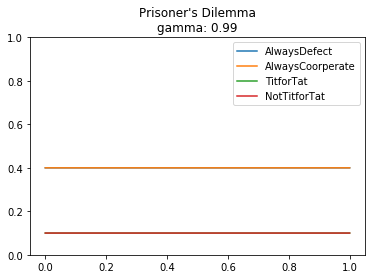

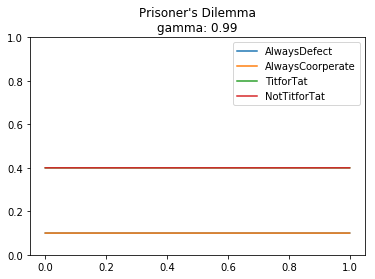

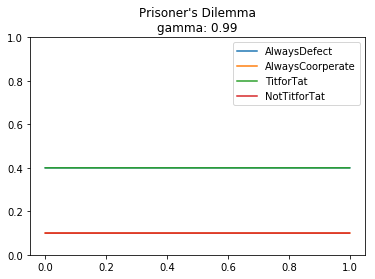

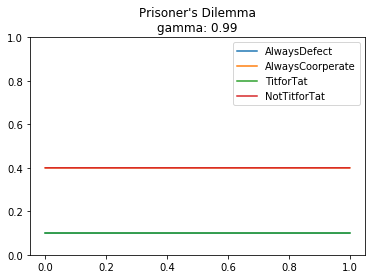

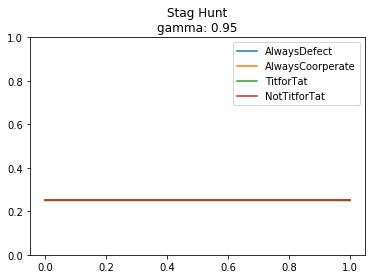

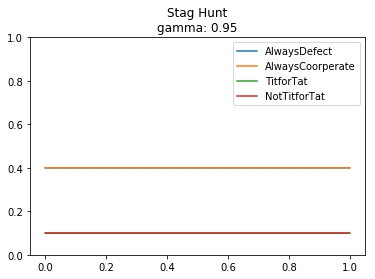

In [80]:
for i in range(12):
    plays1 = np.array(json.loads(df.iloc[i]['agent1']))
    plays2 = np.array(json.loads(df.iloc[i]['agent2']))
    plays3 = np.array(json.loads(df.iloc[i]['agent3']))
    plays4 = np.array(json.loads(df.iloc[i]['agent4']))
    plt.plot(plays1, label=agents[0])
    plt.plot(plays2, label=agents[1])
    plt.plot(plays3, label=agents[2])
    plt.plot(plays4, label=agents[3])
    plt.title("{}\ngamma: {}".format(df.iloc[i]["game"], df.iloc[i]["gamma"]))
    plt.legend()
    plt.ylim((0,1))
    plt.show()

In [ ]:
df['agent1_cat'] = df.agent1.astype("category").cat.codes
df['agent2_cat'] = df.agent2.astype("category").cat.codes
df['game_cat'] = df['agent1_cat'] + df['agent2_cat']

df.head()

y = df['win']
X = df[['game_cat', 'n_plays']]

mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 